# Compare Linear Regression with Random Forest

## Libraries and settings

In [43]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error
import gradio as gr
from datetime import datetime

## Import the flight delay data

In [2]:
# Read and select variables
df_orig = pd.read_csv("zrh_flightdelay.csv", sep=",", encoding='utf-8')

# Remove missing values
df = df_orig.dropna()
# Remove duplicates
df = df.drop_duplicates()

print(df.shape)
df.head(10)

(2918, 21)


,DESTINATION,IATA_CODE,AIRLINE,AIRCRAFT,DATETIME,DEPART_TIME,DEPART_DATETIME,DELAY_MINUTES,DATETIME_HOUR,Weather_Condition,...,Dew_Point,Relative_Humidity,Total_Precipitation,Wind_Direction,Average_Wind_Speed,Wind_Peak_Gust,SeaLevel_Air_Pressure,DEST_CODE,AIRLINE_CODE,AIRCRAFT_CODE
0,Larnaca,LCA,Edelweiss Air,A320,2025-04-28 05:45:00,06:02,2025-04-28 06:02:00,17,2025-04-28 05:00:00,5,...,5.3,99,0,309,6,9.3,1025.3,97,38,3
1,Pristina,PRN,Chair Airlines,A319,2025-04-28 05:45:00,06:00,2025-04-28 06:00:00,15,2025-04-28 05:00:00,5,...,5.3,99,0,309,6,9.3,1025.3,153,30,2
2,Olbia,OLB,Edelweiss Air,A320,2025-04-28 06:25:00,06:45,2025-04-28 06:45:00,20,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,138,38,3
3,Marrakesh,RAK,Edelweiss Air,A320,2025-04-28 06:25:00,06:35,2025-04-28 06:35:00,10,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,116,38,3
4,Madrid,MAD,Helvetic Airways,E295,2025-04-28 06:55:00,07:13,2025-04-28 07:13:00,18,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,108,63,47
5,Belgrade,BEG,Swiss,BCS3,2025-04-28 06:55:00,07:14,2025-04-28 07:14:00,19,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,17,105,25
6,Frankfurt,FRA,Helvetic Airways,E190,2025-04-28 06:55:00,07:06,2025-04-28 07:06:00,11,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,64,63,44
7,London,LCY,Swiss,BCS1,2025-04-28 06:55:00,07:34,2025-04-28 07:34:00,39,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,103,105,24
8,Palma de Mallorca,PMI,Swiss,A321,2025-04-28 06:50:00,07:11,2025-04-28 07:11:00,21,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,144,105,4
9,Brindisi,BDS,Swiss,A320,2025-04-28 06:50:00,07:17,2025-04-28 07:17:00,27,2025-04-28 06:00:00,5,...,6.0,97,0,192,3,8.0,1025.2,31,105,3


In [3]:
print(df.columns)

Index(['DESTINATION', 'IATA_CODE', 'AIRLINE', 'AIRCRAFT', 'DATETIME',
       'DEPART_TIME', 'DEPART_DATETIME', 'DELAY_MINUTES', 'DATETIME_HOUR',
       'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed',
       'Wind_Peak_Gust', 'SeaLevel_Air_Pressure', 'DEST_CODE', 'AIRLINE_CODE',
       'AIRCRAFT_CODE'],
      dtype='object')


## Train/Test splitting

In [4]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed', 'Wind_Peak_Gust', 'SeaLevel_Air_Pressure']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [5]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.025871835125259368
Test score:  0.04120480179452801
Train RMSE:  21.097692291379715
Test RMSE:  22.34593308256459


In [6]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.6420105715299655
Test score:  0.017690523245318834
Train RMSE:  12.789748507062992
Test RMSE:  22.618288311962846


['DEST_CODE' 'AIRCRAFT_CODE' 'AIRLINE_CODE' 'Wind_Direction' 'Dew_Point'
 'SeaLevel_Air_Pressure' 'Wind_Peak_Gust' 'Relative_Humidity'
 'Temperature' 'Average_Wind_Speed' 'Weather_Condition'
 'Total_Precipitation']
[0.33814612 0.22575118 0.18730929 0.05357132 0.03469326 0.03273114
 0.03229315 0.03171623 0.02910055 0.02610793 0.00857984 0.        ]


<Axes: ylabel='features'>

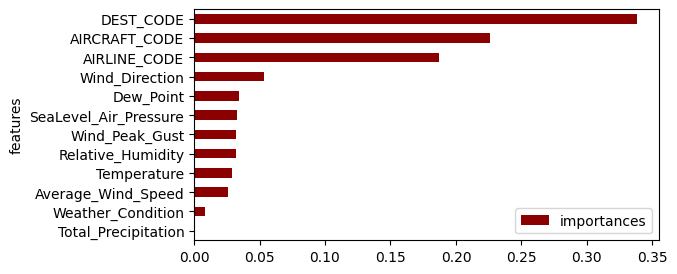

In [7]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

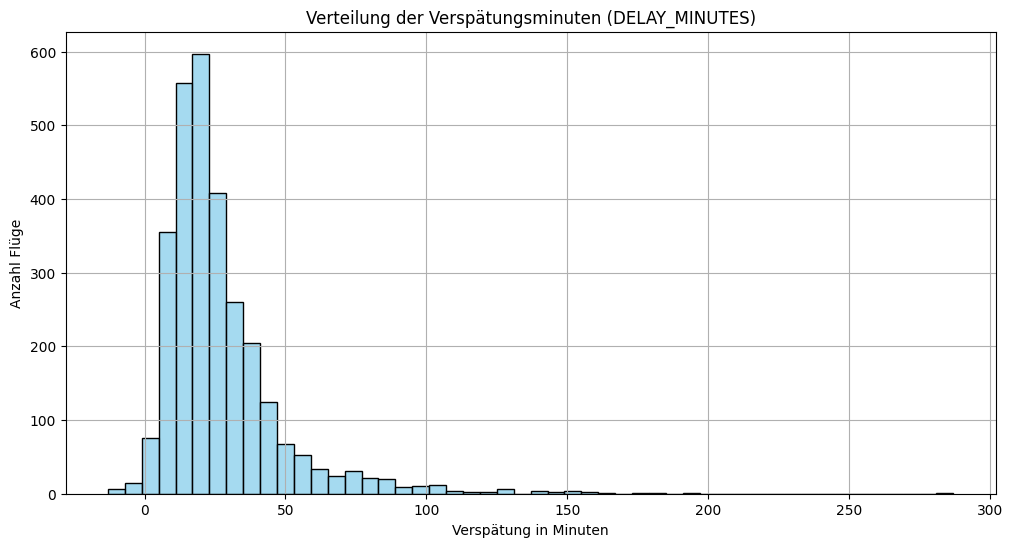

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df["DELAY_MINUTES"], bins=50, kde=False, color="skyblue")

plt.title("Verteilung der Verspätungsminuten (DELAY_MINUTES)")
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Anzahl Flüge")
plt.grid(True)
plt.show()


In [9]:
# Negative Werte auf 0 setzen
df["DELAY_MINUTES"] = df["DELAY_MINUTES"].clip(lower=0)

# Zeilen mit mehr als 120 Minuten Verspätung entfernen
df = df[df["DELAY_MINUTES"] <= 120]


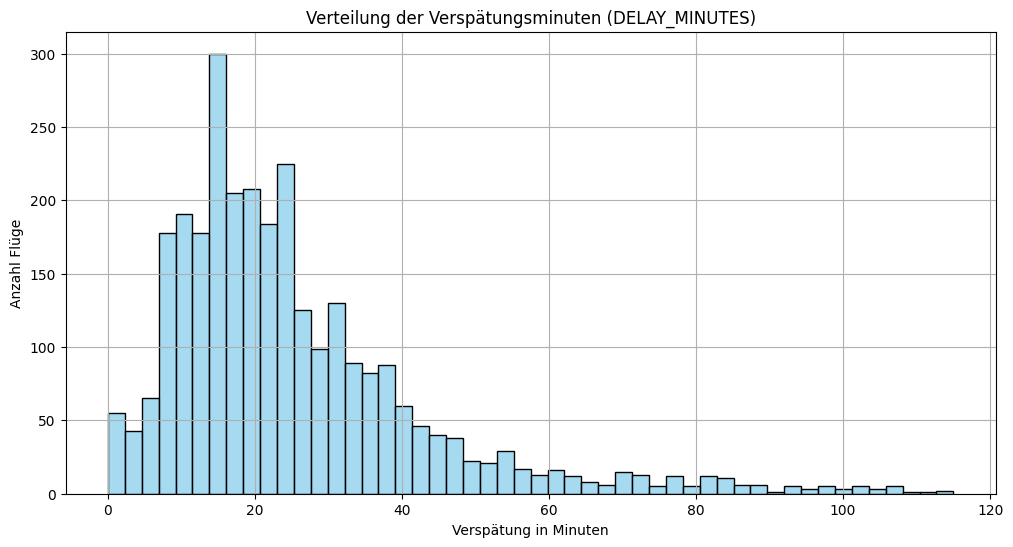

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df["DELAY_MINUTES"], bins=50, kde=False, color="skyblue")

plt.title("Verteilung der Verspätungsminuten (DELAY_MINUTES)")
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Anzahl Flüge")
plt.grid(True)
plt.show()


In [11]:
df.shape

(2892, 21)

In [12]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed', 'Wind_Peak_Gust', 'SeaLevel_Air_Pressure']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [13]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.037516017331170826
Test score:  0.026118627529029936
Train RMSE:  17.766279668560657
Test RMSE:  17.038285649771538


In [14]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.62167229640718
Test score:  -0.17325039477314652
Train RMSE:  11.138682144353048
Test RMSE:  18.70114596408582


['DEST_CODE' 'AIRCRAFT_CODE' 'AIRLINE_CODE' 'Wind_Direction'
 'SeaLevel_Air_Pressure' 'Relative_Humidity' 'Temperature' 'Dew_Point'
 'Wind_Peak_Gust' 'Average_Wind_Speed' 'Weather_Condition'
 'Total_Precipitation']
[0.3563336  0.2351432  0.17993422 0.05095996 0.04342001 0.02897085
 0.0271214  0.02609216 0.02344452 0.01933062 0.00924946 0.        ]


<Axes: ylabel='features'>

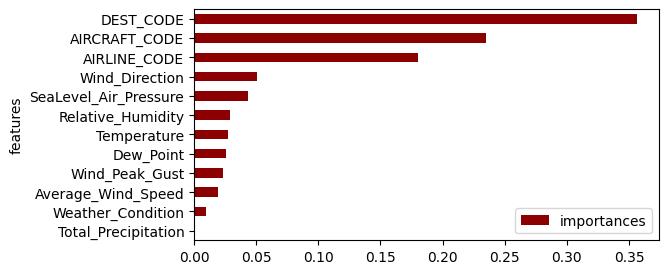

In [15]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [16]:
# Schritt 1: In datetime-Format umwandeln (falls noch nicht geschehen)
df["DATETIME"] = pd.to_datetime(df["DATETIME"])

# Schritt 2: Neue Spalte mit Wochentagszahl hinzufügen (Montag = 0, Sonntag = 6)
df["Weekday"] = df["DATETIME"].dt.weekday

# Weekday name
df["Weekday_name"] = df["DATETIME"].dt.day_name()



In [17]:
df.head(10)

,DESTINATION,IATA_CODE,AIRLINE,AIRCRAFT,DATETIME,DEPART_TIME,DEPART_DATETIME,DELAY_MINUTES,DATETIME_HOUR,Weather_Condition,...,Total_Precipitation,Wind_Direction,Average_Wind_Speed,Wind_Peak_Gust,SeaLevel_Air_Pressure,DEST_CODE,AIRLINE_CODE,AIRCRAFT_CODE,Weekday,Weekday_name
0,Larnaca,LCA,Edelweiss Air,A320,2025-04-28 05:45:00,06:02,2025-04-28 06:02:00,17,2025-04-28 05:00:00,5,...,0,309,6,9.3,1025.3,97,38,3,0,Monday
1,Pristina,PRN,Chair Airlines,A319,2025-04-28 05:45:00,06:00,2025-04-28 06:00:00,15,2025-04-28 05:00:00,5,...,0,309,6,9.3,1025.3,153,30,2,0,Monday
2,Olbia,OLB,Edelweiss Air,A320,2025-04-28 06:25:00,06:45,2025-04-28 06:45:00,20,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,138,38,3,0,Monday
3,Marrakesh,RAK,Edelweiss Air,A320,2025-04-28 06:25:00,06:35,2025-04-28 06:35:00,10,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,116,38,3,0,Monday
4,Madrid,MAD,Helvetic Airways,E295,2025-04-28 06:55:00,07:13,2025-04-28 07:13:00,18,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,108,63,47,0,Monday
5,Belgrade,BEG,Swiss,BCS3,2025-04-28 06:55:00,07:14,2025-04-28 07:14:00,19,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,17,105,25,0,Monday
6,Frankfurt,FRA,Helvetic Airways,E190,2025-04-28 06:55:00,07:06,2025-04-28 07:06:00,11,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,64,63,44,0,Monday
7,London,LCY,Swiss,BCS1,2025-04-28 06:55:00,07:34,2025-04-28 07:34:00,39,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,103,105,24,0,Monday
8,Palma de Mallorca,PMI,Swiss,A321,2025-04-28 06:50:00,07:11,2025-04-28 07:11:00,21,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,144,105,4,0,Monday
9,Brindisi,BDS,Swiss,A320,2025-04-28 06:50:00,07:17,2025-04-28 07:17:00,27,2025-04-28 06:00:00,5,...,0,192,3,8.0,1025.2,31,105,3,0,Monday


In [18]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Weather_Condition', 'Temperature', 'Dew_Point', 'Relative_Humidity',
       'Total_Precipitation', 'Wind_Direction', 'Average_Wind_Speed', 'Wind_Peak_Gust', 'SeaLevel_Air_Pressure', 'Weekday']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [19]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.03753205261228876
Test score:  0.026183303942397984
Train RMSE:  17.766131672084548
Test RMSE:  17.037719875780304


In [20]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.7899925706932738
Test score:  -0.043622612689675044
Train RMSE:  8.298833822022505
Test RMSE:  17.63780779869483


['DEST_CODE' 'AIRCRAFT_CODE' 'AIRLINE_CODE' 'Weekday'
 'SeaLevel_Air_Pressure' 'Wind_Direction' 'Dew_Point' 'Wind_Peak_Gust'
 'Temperature' 'Relative_Humidity' 'Average_Wind_Speed'
 'Weather_Condition' 'Total_Precipitation']
[0.3572463  0.20808263 0.17324537 0.09318884 0.03724551 0.02685708
 0.02554748 0.02162852 0.02021252 0.0173262  0.01408597 0.00533358
 0.        ]


<Axes: ylabel='features'>

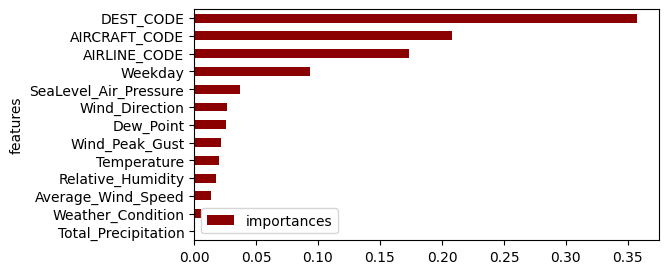

In [21]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [22]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Wind_Direction', 'SeaLevel_Air_Pressure', 'Weekday']], 
                                                         df['DELAY_MINUTES'], 
                                                        test_size=0.20, 
                                                        random_state=42)

In [23]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))
 

Train score:  0.02623859369212589
Test score:  0.017817479704785644
Train RMSE:  17.870060293002737
Test RMSE:  17.110746841905744


In [24]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42, max_depth=10)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

Train score:  0.5274217087331075
Test score:  0.06272965986787993
Train RMSE:  12.449061794431937
Test RMSE:  16.714958491536695


['DEST_CODE' 'AIRLINE_CODE' 'AIRCRAFT_CODE' 'Weekday'
 'SeaLevel_Air_Pressure' 'Wind_Direction']
[0.31978208 0.20634529 0.20598017 0.12628062 0.08721257 0.05439927]


<Axes: ylabel='features'>

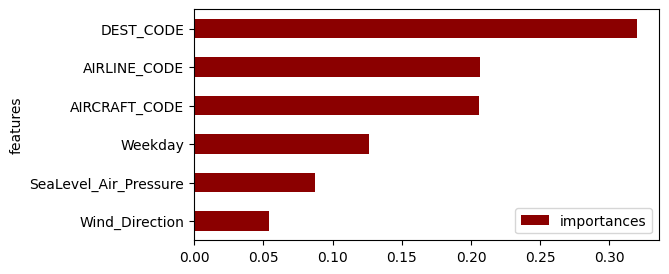

In [25]:
cols = random_forest_model.feature_names_in_

# Derive feature importance from random forest
importances = random_forest_model.feature_importances_
std         = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances',
           x='features', 
           color='darkred', 
           figsize=(6,3))

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='r2')
print("CV R² mean:", scores.mean())


CV R² mean: 0.04682607863132378


In [27]:
# Features (X) und Zielvariable (y) festlegen
X = df[['DEST_CODE', 'AIRLINE_CODE', 'AIRCRAFT_CODE', 'Weekday', 'SeaLevel_Air_Pressure', 'Wind_Direction']]
y = df['DELAY_MINUTES'] 

In [28]:
# Trainiere das Modell (Verwendung von RandomForestRegressor für Preisvorhersage)
model = RandomForestRegressor(random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")

# Train on the full dataset
model.fit(X, y)
train_accuracy = model.score(X, y)
print(f"Training accuracy: {train_accuracy:.4f}")

Cross-validation accuracy: -0.2908
Training accuracy: 0.7817


In [29]:
# Gradio-Vorhersagefunktion
def predict(DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE, Weekday, SeaLevel_Air_Pressure, Wind_Direction):
    input_data = [[DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE, Weekday, SeaLevel_Air_Pressure, Wind_Direction]]
    prediction = model.predict(input_data)[0]
    return round(prediction)

In [31]:
predict(10, 88, 88, 2, 1025.2, 309)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


35

In [49]:
# Extrahiere die einzigartigen Werte für Destination, Airline und Aircraft und sortiere sie aufsteigend
destinations = sorted(df['DESTINATION'].unique().tolist())  # Aufsteigend sortieren
airlines = sorted(df['AIRLINE'].unique().tolist())  # Aufsteigend sortieren
aircrafts = sorted(df['AIRCRAFT'].unique().tolist())  # Aufsteigend sortieren

# Mapping von Städtenamen zu DEST_CODE erstellen
city_to_code = dict(zip(df['DESTINATION'], df['DEST_CODE']))

# Mapping von Airline zu AIRLINE_CODE erstellen
airline_to_code = dict(zip(df['AIRLINE'], df['AIRLINE_CODE']))

# Mapping von Aircraft zu AIRCRAFT_CODE erstellen
aircraft_to_code = dict(zip(df['AIRCRAFT'], df['AIRCRAFT_CODE']))

# Mapping für Wochentag (Text -> Zahl)
weekday_map = {
    "Montag": 0,
    "Dienstag": 1,
    "Mittwoch": 2,
    "Donnerstag": 3,
    "Freitag": 4,
    "Samstag": 5,
    "Sonntag": 6
}

# Gradio Vorhersagefunktion
def predict(destination, airline, aircraft, weekday, SeaLevel_Air_Pressure, Wind_Direction):
    # Hier holen wir uns den entsprechenden Code basierend auf der Eingabe
    DEST_CODE = city_to_code.get(destination, None)
    AIRLINE_CODE = airline_to_code.get(airline, None)
    AIRCRAFT_CODE = aircraft_to_code.get(aircraft, None)
    Weekday = weekday_map.get(weekday, None)

    # Fehlerbehandlung für ungültige Eingaben
    if DEST_CODE is None or AIRLINE_CODE is None or AIRCRAFT_CODE is None or Weekday is None:
        return "Ungültige Eingabe. Bitte überprüfen Sie die eingegebenen Werte."
    
    # Eingabedaten für das Modell
    input_data = [[DEST_CODE, AIRLINE_CODE, AIRCRAFT_CODE, Weekday, SeaLevel_Air_Pressure, Wind_Direction]]
    
    # Vorhersage
    prediction = model.predict(input_data)[0]
    return f"Geschätzte Verspätung für {destination} mit {airline} ({aircraft}): {round(prediction)} Minuten"

# Gradio-Interface erstellen
demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(choices=destinations, label="Destination", value=None),
        gr.Dropdown(choices=airlines, label="Airline", value=None),
        gr.Dropdown(choices=aircrafts, label="Aircraft", value=None),
        gr.Dropdown(choices=["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"], label="Wochentag", value=None),
        gr.Number(label="Luftdruck auf Meereshöhe (hPa)"),
        gr.Slider(0, 360, step=1, label="Windrichtung (°)"),
    ],
    outputs="text",
    title="Flugverspätungsvorhersage",
    description="Geben Sie die Stadt, Fluggesellschaft, Flugzeugtyp und Wetterdaten ein, um die voraussichtliche Verspätung in Minuten vorherzusagen.",
    examples=[
        ["London", "Lufthansa", "A320", "Dienstag", 1025.2, 309],
        ["Paris", "Air France", "B737", "Freitag", 1011.0, 180],
        ["New York", "United Airlines", "A333", "Montag", 1005.0, 90],
    ]
)

demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7871
* Running on public URL: https://6cda296d116bd990d4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
